# Mini-Projeto Decision Tree Classifier: Classificação de Sobreviventes do Titanic

## Grupo
* Amanda Cristina (acfml)
* João Marcos (jmav)
* Mateus Galdino (mglg)
* Matheus Augusto (mams4)
* Rodrigo Rossiter Ladvocat Cintra (rrlc)

## Visão Geral do Projeto
Este notebook documenta o desenvolvimento de um modelo de Machine Learning para prever a sobrevivência de passageiros do navio Titanic. O desafio consiste em utilizar Redes Neurais Artificiais, especificamente o modelo Decision Tree Classifier, para classificar os passageiros com base em seus atributos, como classe, idade e sexo.

### Objetivos Específicos
- **Análise Exploratória:** Investigar o dataset para extrair insights e compreender as relações entre as variáveis.
- **Engenharia de Atributos:** Realizar o tratamento de dados faltantes, a codificação de variáveis categóricas (como 'sexo' e 'porto de embarque') e a normalização de variáveis numéricas.
- **Modelagem com DT e RF:** Construir, treinar e validar classificadores, experimentando diferentes arquiteturas e hiperparâmetros.
- **Avaliação de Desempenho:** Avaliar a performance final do modelo utilizando métricas como acurácia, precisão, recall e matriz de confusão.

### Metodologia Aplicada
A abordagem será dividida nas seguintes fases:
1.  **Carregamento e Análise dos Dados:** Importação das bibliotecas e do dataset, seguida por uma exploração inicial.
2.  **Pré-processamento:** Limpeza e transformação dos dados para garantir que estejam prontos para o treinamento.
3.  **Definição e Treinamento do Modelo:** Configuração da arquitetura Decision Tree e execução do processo de treinamento.
4.  **Avaliação e Conclusão:** Análise dos resultados obtidos no conjunto de teste e apresentação das conclusões do projeto.

## Importando bibliotecas

Explicar as bibs que estamos usando e o que elas fazem!!!

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 13.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import optuna
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning




## **Parte 1 - Análise dos Dados**

O dataset utilizado é o da base de dados do kaggle **"Titanic - Machine Learning from Disaster"**, que é um conjunto de dados clássico, amplamente utilizado para o ensino e prática de técnicas de **aprendizado de máquina**.

Ele contém informações detalhadas sobre os passageiros a bordo do **RMS Titanic**, que naufragou em sua viagem inaugural em 1912.

Entre as variáveis disponíveis estão:

- **PassengerId** – Identificador único de cada passageiro  
- **Survived** – Variável alvo: indica se o passageiro sobreviveu ("1") ou não ("0")  
- **Pclass** – Classe do bilhete (1ª, 2ª ou 3ª classe)  
- **Name** – Nome completo do passageiro  
- **Sex** – Gênero do passageiro ("male" ou "female")  
- **Age** – Idade do passageiro em anos  
- **SibSp** – Número de irmãos/cônjuges a bordo  
- **Parch** – Número de pais/filhos a bordo  
- **Ticket** – Número do bilhete  
- **Fare** – Tarifa paga pelo bilhete  
- **Cabin** – Número da cabine (muitos valores ausentes)  
- **Embarked** – Porto de embarque ("C" = Cherbourg, "Q" = Queenstown, "S" = Southampton)

A **variável alvo** é "Survived", que indica se um passageiro **sobreviveu** ("1") ou **não sobreviveu** ("0") ao desastre.

https://www.kaggle.com/c/titanic/data

### Importando Dados

In [ ]:
url_train = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/train.csv'
url_test = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/test.csv'

# Leitura dos datasets
train_set = pd.read_csv(url_train)
test_set = pd.read_csv(url_test)

### Conjunto dos dados de treino e teste

In [ ]:
print("Train Set:")
display(train_set)

print("Test Set:")
display(test_set)

Train Set:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Test Set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_set.shape

(891, 12)

In [ ]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Variáveis numéricas
numeric_features = train_set.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Variáveis categóricas
catagoric_features = train_set.select_dtypes(exclude=np.number)
catagoric_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

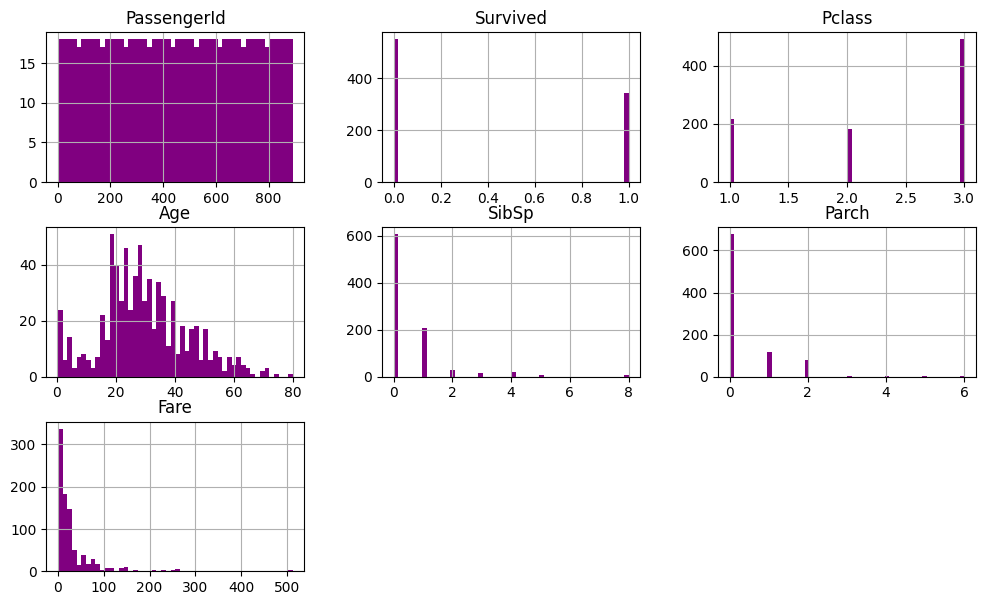

In [ ]:
train_set.hist(bins=50, figsize=(12, 7), color='purple')
plt.show()

### Correlação entre Variáveis

A análise de correlação é uma etapa essencial na exploração de dados, pois permite identificar o grau de relacionamento entre diferentes variáveis do conjunto. Esse tipo de análise ajuda a entender como as variáveis estão conectadas entre si e pode revelar padrões importantes.

Correlações mais fortes podem indicar possíveis influências ou dependências entre variáveis, sendo úteis para decisões em modelagem preditiva, seleção de atributos e interpretação dos dados. No contexto do Titanic, por exemplo, pode-se investigar se características como idade, classe social ou gênero têm relação com a taxa de sobrevivência.

In [ ]:
# Correlação das variáveis numéricas em relação ao atributo 'Survived'
correlation = numeric_features.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 



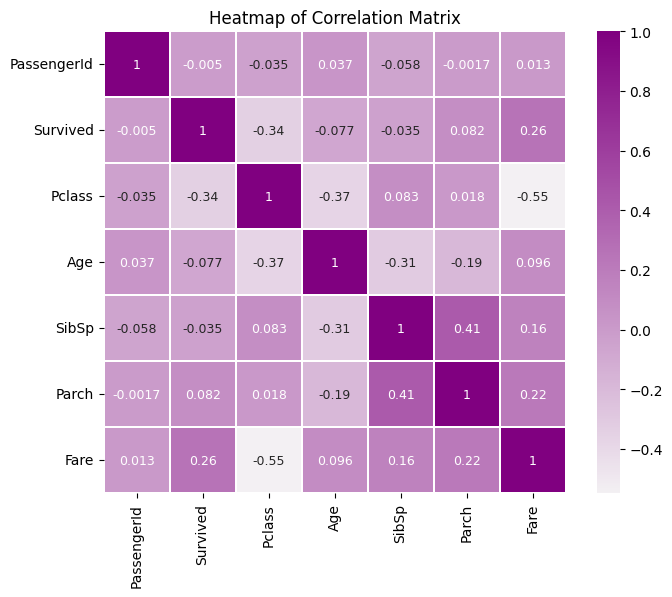

In [ ]:
# Mapa de calor da matriz de correlação entre todas as variáveis
cmap = sns.light_palette('purple', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Heatmap of Correlation Matrix')
plt.show()

A seguir, analisaremos a frequência de sobrevivência dos passageiros em relação à colunas relacionadas.

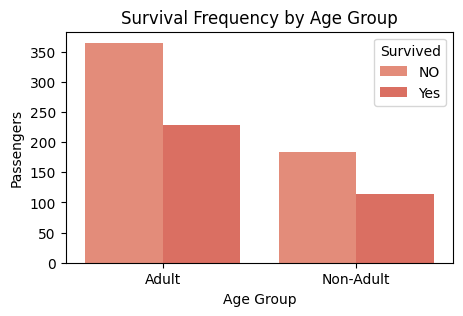

In [ ]:
# Criando um DataFrame para categorizar passageiros adultos e não adultos
train_set['AgeGroup'] = train_set['Age'].apply(lambda x: 'Adult' if x >= 18 and x<= 65 else 'Non-Adult')

# Configurando a paleta de cores
sns.set_palette('Reds_d')

# Plotando a frequência de sobrevivência por classes de idade
plt.figure(figsize=(5, 3))
sns.countplot(x='AgeGroup', hue='Survived', data=train_set)
plt.title('Survival Frequency by Age Group')

plt.xlabel('Age Group')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['NO', 'Yes'])

plt.show()
train_set = train_set.drop(['AgeGroup'], axis=1)

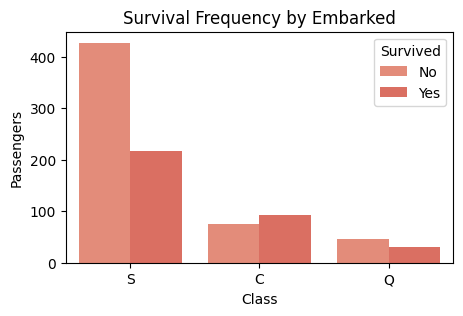

In [ ]:
# Gráfico de sobrevivência por classe social
plt.figure(figsize=(5, 3))
sns.countplot(x='Embarked', hue='Survived', data=train_set)
plt.title('Survival Frequency by Embarked')

plt.xlabel('Class')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()


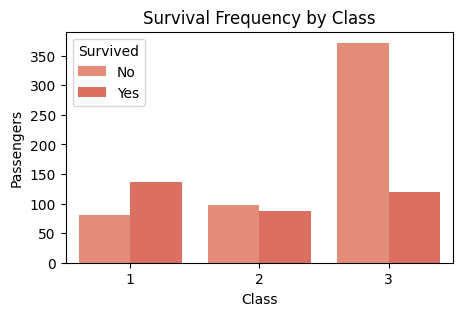

In [ ]:
# Gráfico de sobrevivência por classe social
plt.figure(figsize=(5, 3))
sns.countplot(x='Pclass', hue='Survived', data=train_set)
plt.title('Survival Frequency by Class')

plt.xlabel('Class')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

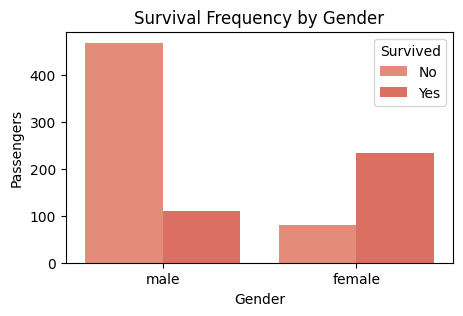

In [ ]:
# Gráfico de sobrevivência por sexo
plt.figure(figsize=(5, 3))
sns.countplot(x='Sex', hue='Survived', data=train_set)
plt.title('Survival Frequency by Gender')

plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

### Dados faltantes
#### A coluna Age apresenta 177 valores faltantes, indicando que uma quantidade significativa de passageiros não teve sua idade registrada. A coluna Cabin é a que apresenta o maior número de dados ausentes, com 687 valores faltantes, sugerindo que muitas cabines não foram registradas ou os passageiros não tinham uma cabine específica. A coluna Embarked possui apenas 2 valores faltantes, mostrando que a maioria dos passageiros tem o porto de embarque registrado.

In [ ]:
missing = train_set.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


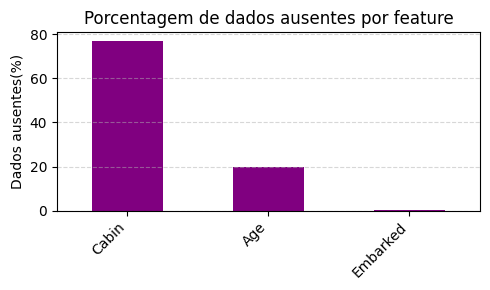

In [ ]:
missing = train_set.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(5, 3))
missing.plot(kind='bar', color='purple')
plt.ylabel('Dados ausentes(%)')
plt.title('Porcentagem de dados ausentes por feature')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Outliers

 Tratando Outliers

Outliers são pontos muito fora da curva (ex: o salário de um diretor vs. o de um estagiário).

 Por que se importar?

* Eles bagunçam a **média**.
* Eles confundem alguns modelos (como Redes Neurais), fazendo-os errar mais.


> Cuidar dos outliers cria um modelo mais confiável.

In [ ]:
def contar_outliers_iqr(df):
    """Calcula a quantidade de outliers para cada coluna numérica de um DataFrame."""
    outliers_dict = {}
    # Itera apenas sobre as colunas numéricas
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outliers_dict[col] = outlier_count

    return outliers_dict



In [ ]:
outliers = contar_outliers_iqr(train_set)

for key, value in outliers.items():
  print(f'{key}: {value}')

PassengerId: 0
Survived: 0
Pclass: 0
Age: 11
SibSp: 46
Parch: 213
Fare: 116


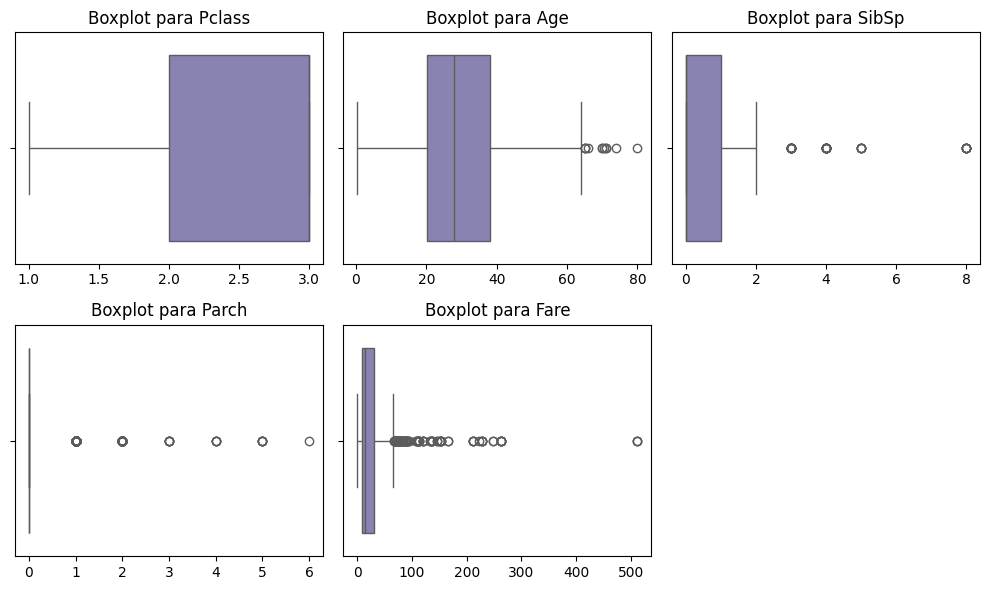

In [ ]:
# Lista de colunas que você deseja plotar ('Survived' foi removida)
cols_to_plot = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Cria a figura e a grade de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
flat_axes = axes.flatten()

# pega a cor da biblioteca
purple_color = sns.color_palette("Purples_d")[2]

# Itera sobre os eixos e colunas para criar os gráficos
for i, col in enumerate(cols_to_plot):
    ax = flat_axes[i]
    sns.boxplot(x=train_set[col], ax=ax, color=purple_color, whis=1.5)
    ax.set_title(f'Boxplot para {col}')
    ax.set_xlabel('')

# Esconde os eixos que não foram utilizados
for i in range(len(cols_to_plot), len(flat_axes)):
    flat_axes[i].set_visible(False)

# Ajusta o layout para que os títulos e gráficos não se sobreponham
plt.tight_layout()
plt.show()

## **Parte 2 - Pré-processamento de Dados**

Removendo campos nome, id, número da cabine e ticket. Esses dados não serão utilizados no treinamento.
Como grande parte dos valores da cabine não estão presentes, não faz sentido completar esses dados.

In [ ]:
dataset = train_set.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Codificação do gênero usando o Label Encoder dado que é binário

In [ ]:
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'].astype(str))

### Dados Ausentes

É necessário completar os valores ausentes da idade, dado que é uma feature relevante para ser excluída do treinamento. A coluna idade apresenta 20% de valores ausentes. Também é preciso *completar* o local de embarque com a moda dos valores. Visto que é uma dado categórico.

In [ ]:
# Imputação na coluna 'Age' utilizando KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset['Age'] = imputer.fit_transform(dataset[['Age']])

In [ ]:
# Imputação para a coluna 'Embarked' através de um treinamento, como é uma categoria não é possível usar KNNImputer
dataset_imp = dataset.copy()
dataset_imp.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
# Treinando com base nas outras features
train_imp = dataset_imp.dropna()
test_imp = dataset_imp[dataset_imp.isna().any(axis=1)]

In [ ]:
# Separar X e y
X_train_imp = train_imp.drop('Embarked', axis = 1)
y_train_imp = train_imp['Embarked']
X_test_imp = test_imp.drop('Embarked', axis = 1)

In [ ]:
# Encoding no y_train
le = LabelEncoder()
y_train_imp = le.fit_transform(y_train_imp)

In [ ]:
# aplicar feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_imp = sc.fit_transform(X_train_imp)
X_test_imp = sc.transform(X_test_imp)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_imp, y_train_imp)

KNeighborsClassifier()

In [ ]:
y_pred_imp = classifier.predict(X_test_imp)

In [ ]:
y_test_original = le.inverse_transform(y_pred_imp)
print(y_test_original)

['S' 'C']


In [ ]:
test_imp.loc[test_imp.index, 'Embarked'] = y_test_original
test_imp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,0,38.0,0,0,80.0,S
829,1,1,0,62.0,0,0,80.0,C


In [ ]:
# desfazendo feature scaling
X_train_imp = sc.inverse_transform(X_train_imp)
X_test_imp = sc.inverse_transform(X_test_imp)
dataset_completed = pd.concat([train_imp, test_imp], axis = 0)

In [ ]:
# Atualizando dataset original
dataset = dataset_completed.copy()

### Tratamento de Outliers

In [ ]:
def tratar_features_numericas(df):
    """Aplica os tratamentos de outliers e transformações em um DataFrame."""
    df_tratado = df.copy()

    if 'Fare' in df_tratado.columns:
        df_tratado['Fare'] = np.log1p(df_tratado['Fare'])

    return df_tratado

In [ ]:
dataset = tratar_features_numericas(dataset)


In [ ]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values

###Codificação de Atributos



Codificação usando OneHotEncoder para o porto de embarque

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Divisão dos dados




In [ ]:
X_not_survived = []
y_not_survived = []
X_survived = []
y_survived = []
for i in range(len(X)):
  if y[i] == 0:
    X_not_survived.append(X[i, :])
    y_not_survived.append(y[i])
  else:
    X_survived.append(X[i, :])
    y_survived.append(y[i])

X_not_survived = np.array(X_not_survived)
y_not_survived = np.array(y_not_survived)
X_survived = np.array(X_survived)
y_survived = np.array(y_survived)

### Dividindo os dados por classe

In [ ]:
print(len(X_not_survived))
print(len(y_not_survived))
print(len(X_survived))
print(len(y_survived))

549
549
342
342


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_not_survived,y_not_survived,
    train_size=0.75,
    random_state=1)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_survived,y_survived,
    train_size=0.75,
    random_state=1)

In [ ]:
print(len(X_train_1))
print(len(X_train_2))

print(len(X_test_1))
print(len(X_test_2))

411
256
138
86


In [ ]:
X_train = np.concatenate((X_train_1, X_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

X_test = np.concatenate((X_test_1, X_test_2), axis=0)
y_test = np.concatenate((y_test_1, y_test_2), axis=0)

In [ ]:
print(len(X_train))
print(len(X_test))

667
224


### Igualando tamanho das classes

In [ ]:
# É necessário garantir o equilíbrio das classes para o conjunto de treino e de validação
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
print(len(X_train))
print(len(X_test))

822
224


### Verificando se as classes estão devidamente equilibradas

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np  # Garante que np.ndarray seja reconhecido, se necessário

print("--- Contagem de Classes Após Superamostragem ---")

# Para o conjunto de TREINO:
print("\nConjunto de Treino (y_train):")
if isinstance(y_train, (pd.Series, pd.DataFrame)):
    print(y_train.value_counts())
elif isinstance(y_train, np.ndarray):
    print(Counter(y_train))
else:
    print("Tipo de y_train não reconhecido para value_counts ou Counter.")

print("\n--- Fim da Verificação ---")

--- Contagem de Classes Após Superamostragem ---

Conjunto de Treino (y_train):
Counter({np.int64(0): 411, np.int64(1): 411})

--- Fim da Verificação ---


### Normalização dos dados

In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

## **Parte 3 - Treinamento utilizando Árvore de decisão**

### Análise Experimental

Para treinar o classificador utilizando o método Árvore de Decisão da biblioteca sklearn.tree, seguimos um processo estruturado que envolve as seguintes etapas principais:

- 🔹 Separação dos conjuntos de dados
- 🔹 Treinamento e teste do modelo
- 🔹 Validação final com o conjunto de teste original

### Separação dos Conjuntos

Inicialmente, realizamos a divisão do conjunto de treino (train_set) em:

- X_train e y_train — para o treinamento do modelo  
- X_test e y_test — para teste intermediário e avaliação de desempenho

O conjunto de teste original (test_set) é reservado para a **validação final**, permitindo avaliar a capacidade de generalização do modelo em dados nunca vistos.

### Treinamento / Teste de Modelos

Para realizar uma análise abrangente dos dados, treinamos o classificador utilizando diferentes arquiteturas e parâmetros do DecisionTreeClassifier.

As principais variáveis ajustadas foram:


---

## Estratégia de Treinamento

A fim de entender melhor o comportamento dos modelos, podemos modificar um parâmetro por vez, na seguinte ordem:

  


---




### Avaliação de Desempenho

Para selecionar a métrica mais apropriada para avaliação da rede neural, consideramos:

### Acurácia
Proporção de previsões corretas em relação ao total de instâncias:

$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN} \tag{1}
$$

### Precisão
Capacidade de prever corretamente os positivos (evita falsos positivos):

$$
\text{Precisão} = \frac{TP}{TP + FP} \tag{2}
$$

### Recall
Capacidade de identificar todos os positivos reais (evita falsos negativos):

$$
\text{Recall} = \frac{TP}{TP + FN} \tag{3}
$$

### F1-Score
Média harmônica entre precisão e recall:

$$
F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}} \tag{4}
$$

---

> Embora a acurácia forneça uma visão geral do desempenho, ela pode ser **enganosa em conjuntos de dados desbalanceados**. Por isso, as métricas de **precisão, recall e F1-score** são especialmente importantes para avaliar a qualidade real das previsões.
Do conjunto de treino, temos:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[113  25]
 [ 22  64]]


0.7901785714285714

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(accuracies)

[0.85542169 0.81927711 0.7804878  0.7804878  0.80487805 0.7804878
 0.8902439  0.93902439 0.8902439  0.8902439 ]


## Árvore de Decisão



**Parâmetros do classificador**

1. **Criterion:** A função para medir a qualidade de uma divisão.
2. **Splitter:** O critério usado para escolher a divisão em cada nó.
3. **Max. Depth:** A profundidade máxima da árvore.
4. **Min. Samples Split:** O número mínimo de amostras necessário para dividir um nó interno.
5. **Min. Samples Leaf:** O número mínimo de amostras necessário para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos $n$ amostras de treinamento em cada um dos ramos esquerdo e direito.
6. **Min. Weight Fraction Leaf:** A fração mínima da soma ponderada dos pesos (de todas as amostras de entrada) necessária para estar em um nó folha.
7. **Max. Features:** O número de características a considerar ao procurar a melhor divisão.
8. **Max. Leaf Nodes:** Cria uma árvore com, no máximo, $n$ folhas de forma a escolher os melhores nós primeiro. Os melhores nós são definidos pela redução relativa na impureza.
9. **Min. Impurity Decrease:** Um nó só será dividido se essa divisão induzir uma redução na impureza maior ou igual a $n$. A equação da redução ponderada da impureza é:
$$\frac{N_t}{N} ⋅ (impurity - \frac{N_{tR}}{N_t} * rightImpurity - \frac{N_{tL}}{N_t} * leftImpurity)$$
onde $N$ é o número total de amostras, $N_t$ é o número de amostras no nó atual, $N_{tL}$ é o número de amostras no filho esquerdo e $N_{tR}$ é o número de amostras no filho direito.
10. **Class Weight:** Pesos associados com as classes.
11. **CCP Alfa:** Parâmetro de complexidade usado para o Minimal Cost-Complexity Pruning. A subárvore com a maior complexidade de custo que for menor que $n$ será escolhida.
12. **Monotonic Constraint:** Restrições sobre a monotonicidade das características. Se um valor for -1 ou 1, a árvore forçará a restrição de que a previsão seja monótona em relação à característica; caso contrário, se for 0, a previsão não terá restrição.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas de modelagem carregadas com sucesso!")

Bibliotecas de modelagem carregadas com sucesso!


Treinamento do Modelo de Árvore de Decisão (Baseline)


--- Relatório de Classificação (Modelo Base) ---
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       138
           1       0.72      0.74      0.73        86

    accuracy                           0.79       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.79      0.79       224


--- Matriz de Confusão (Modelo Base) ---


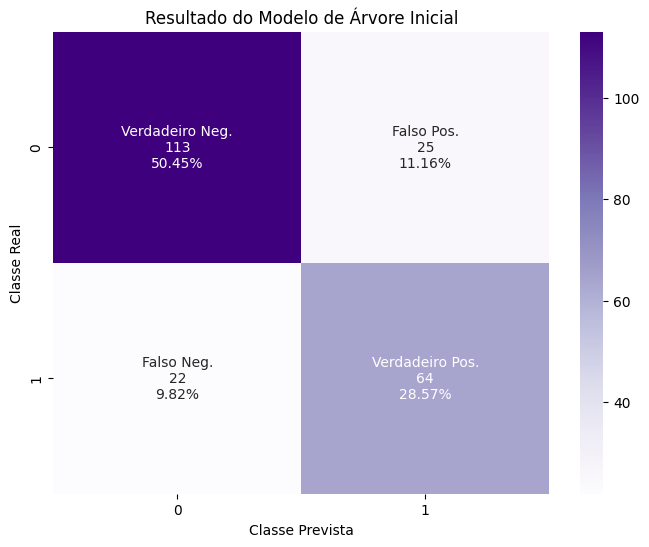

In [ ]:
# 1. Instanciar o classificador
# Usamos random_state para garantir que os resultados sejam reproduzíveis
modelo_arvore_base = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo com os dados de treino
modelo_arvore_base.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
previsoes_base = modelo_arvore_base.predict(X_test)

# 4. Avaliar o desempenho do modelo
print("\n--- Relatório de Classificação (Modelo Base) ---")
print(classification_report(y_test, previsoes_base))

# 5. Visualizar a Matriz de Confusão
print("\n--- Matriz de Confusão (Modelo Base) ---")
matriz_confusao_base = confusion_matrix(y_test, previsoes_base)

# Preparação dos Rótulos com Contagens e Porcentagens
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos = ["{0:0.0f}".format(value) for value in matriz_confusao_base.flatten()]
total_predicoes = np.sum(matriz_confusao_base)
porcentagens_grupos = ["{0:.2%}".format(value/total_predicoes) for value in matriz_confusao_base.flatten()]
labels_matriz = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos, porcentagens_grupos)]
labels_matriz = np.asarray(labels_matriz).reshape(2, 2)


# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_base, annot=labels_matriz, fmt='', cmap='Purples')
plt.title('Resultado do Modelo de Árvore Inicial')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

Estrutura da Árvore

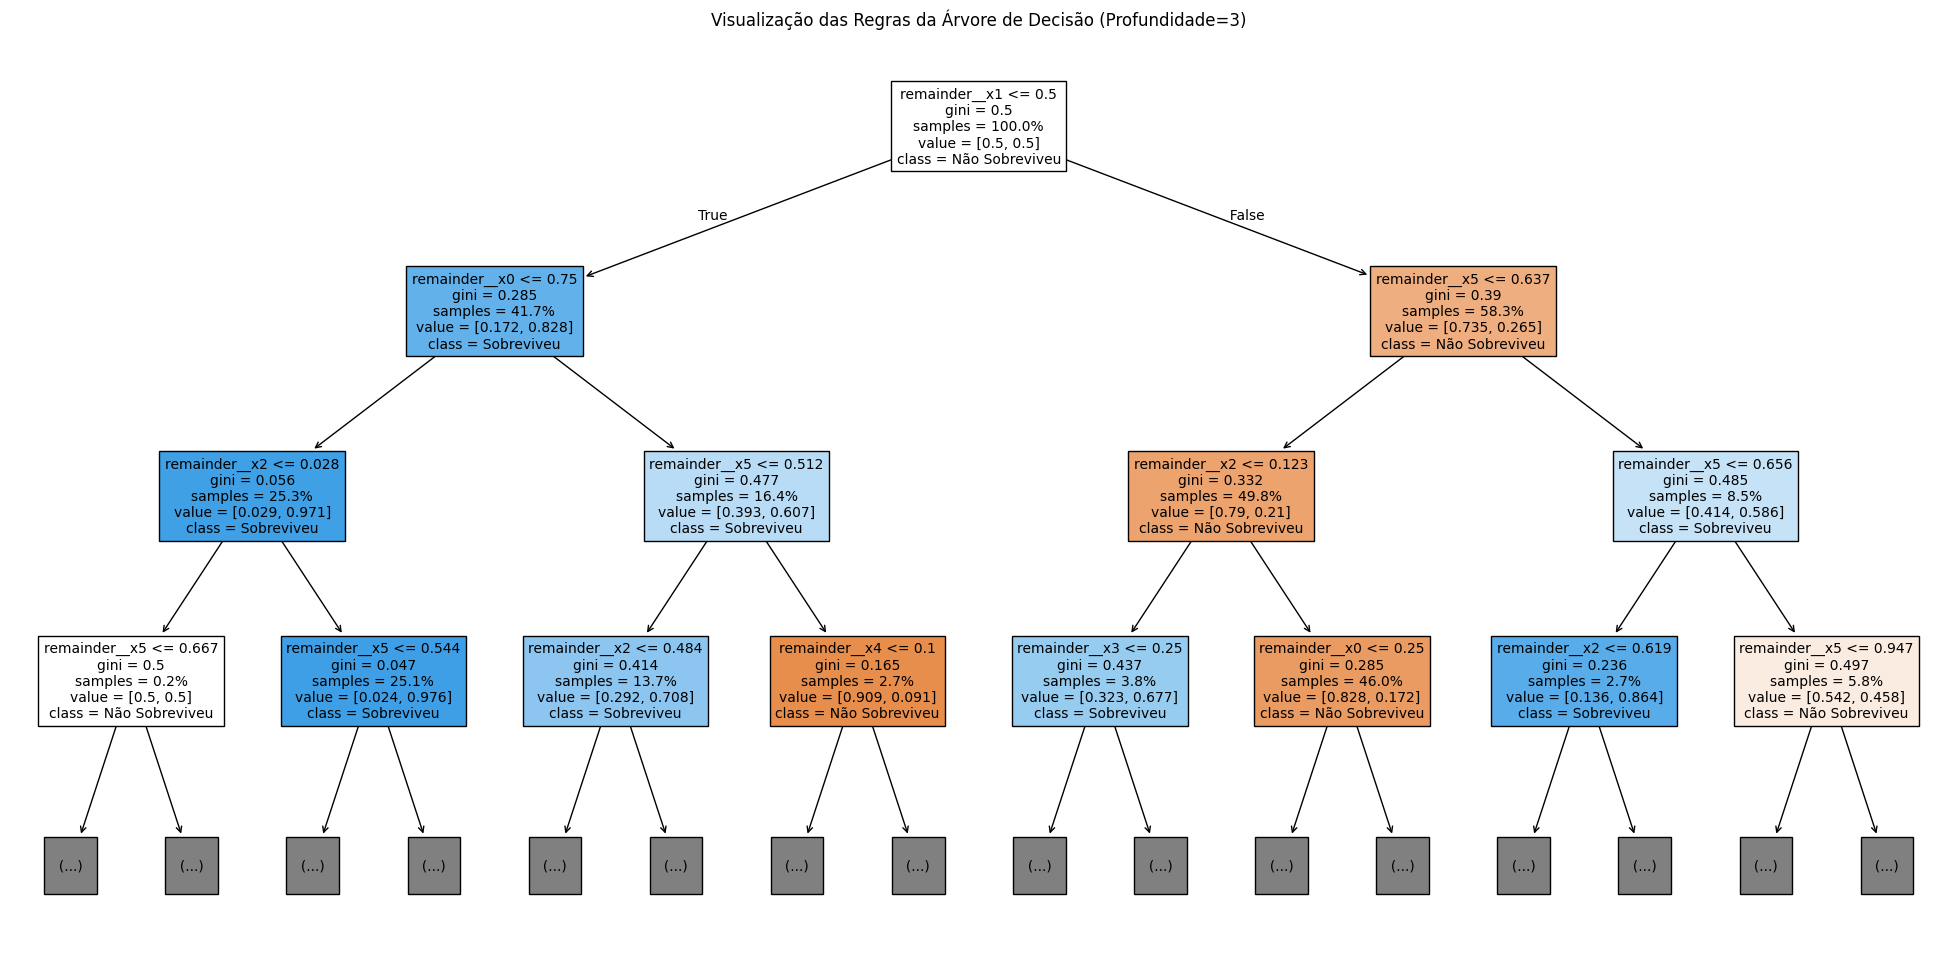

In [ ]:
# Recuperando os nomes das features do ColumnTransformer (ct)
try:
    nomes_features = ct.get_feature_names_out()
except AttributeError:
    # Fallback para versões mais antigas do scikit-learn
    cat_features = ct.transformers_[0][1].get_feature_names(['Embarked'])
    num_features = [col for col in dataset.columns if col not in ['Survived', 'Embarked']]
    nomes_features = list(cat_features) + list(num_features)


nomes_classes = ['Não Sobreviveu', 'Sobreviveu']

plt.figure(figsize=(25, 12))
plot_tree(modelo_arvore_base,
          feature_names=nomes_features,
          class_names=nomes_classes,
          filled=True,
          max_depth=3,  # Limitar a profundidade para uma visualização clara
          fontsize=10,
          proportion=True) # Mostra a proporção das amostras em cada nó

plt.title("Visualização das Regras da Árvore de Decisão (Profundidade=3)")
plt.show()

### Buscando melhores hiperparâmtros

#### GridSearch

In [ ]:
# Definindo a grade de parâmetros a serem testados
parametros_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 9, 11],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

# Configurando o GridSearchCV
# cv=5 significa 5-fold cross-validation
grid_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=parametros_grid,
                       cv=5,
                       n_jobs=-1, # Utiliza todos os núcleos de CPU disponíveis
                       verbose=1)

# Executando a busca
grid_cv.fit(X_train, y_train)

print("Melhores parâmetros encontrados: ", grid_cv.best_params_)
print("Melhor score de validação cruzada (acurácia): {:.2f}%".format(grid_cv.best_score_ * 100))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores parâmetros encontrados:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor score de validação cruzada (acurácia): 83.83%


Avaliação do Modelo Otimizado


--- Relatório de Classificação (Modelo Otimizado) ---
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       138
           1       0.73      0.72      0.73        86

    accuracy                           0.79       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.79      0.79       224


--- Matriz de Confusão (Modelo Otimizado) ---


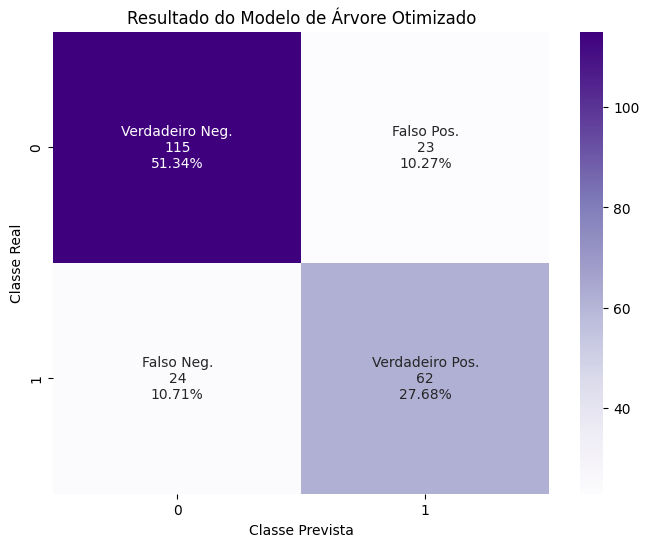

In [ ]:
# O melhor modelo já vem treinado após o .fit() do GridSearchCV
modelo_otimizado = grid_cv.best_estimator_

# Fazer previsões com o modelo otimizado
previsoes_otimizadas = modelo_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relatório de Classificação (Modelo Otimizado) ---")
print(classification_report(y_test, previsoes_otimizadas))

# Visualizar a Matriz de Confusão
print("\n--- Matriz de Confusão (Modelo Otimizado) ---")
matriz_confusao_otimizada = confusion_matrix(y_test, previsoes_otimizadas)

# Preparação dos Rótulos com Contagens e Porcentagens
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_otimizada = ["{0:0.0f}".format(value) for value in matriz_confusao_otimizada.flatten()]
total_predicoes_otimizado = np.sum(matriz_confusao_otimizada)
porcentagens_grupos_otimizada = ["{0:.2%}".format(value/total_predicoes_otimizado) for value in matriz_confusao_otimizada.flatten()]
labels_matriz_otimizada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_otimizada, porcentagens_grupos_otimizada)]
labels_matriz_otimizada = np.asarray(labels_matriz_otimizada).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_otimizada, annot=labels_matriz_otimizada, fmt='', cmap='Purples')
plt.title('Resultado do Modelo de Árvore Otimizado')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

####  Optuna

[I 2025-07-25 14:26:01,634] A new study created in memory with name: no-name-d705c241-c0e3-43e0-bca6-edbbd232a4cd
[I 2025-07-25 14:26:01,651] Trial 0 finished with value: 0.7901785714285714 and parameters: {'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7901785714285714.
[I 2025-07-25 14:26:01,673] Trial 1 finished with value: 0.8080357142857143 and parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8080357142857143.
[I 2025-07-25 14:26:01,682] Trial 2 finished with value: 0.7544642857142857 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.8080357142857143.
[I 2025-07-25 14:26:01,692] Trial 3 finished with value: 0.8080357142857143 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial

--- Iniciando otimização com Optuna ---


[I 2025-07-25 14:26:01,883] Trial 11 finished with value: 0.8214285714285714 and parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 20}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:01,920] Trial 12 finished with value: 0.8214285714285714 and parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 17}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:01,959] Trial 13 finished with value: 0.8214285714285714 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 16}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:01,999] Trial 14 finished with value: 0.8214285714285714 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:02,049] Trial 15 finished with value: 0.8125 and parameter


--- Treinando o modelo final com os melhores hiperparâmetros ---

--- Relatório de Classificação (Modelo Otimizado com Optuna) ---
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       138
           1       0.80      0.78      0.79        86

    accuracy                           0.84       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.84      0.84      0.84       224


--- Matriz de Confusão (Modelo Otimizado com Optuna) ---


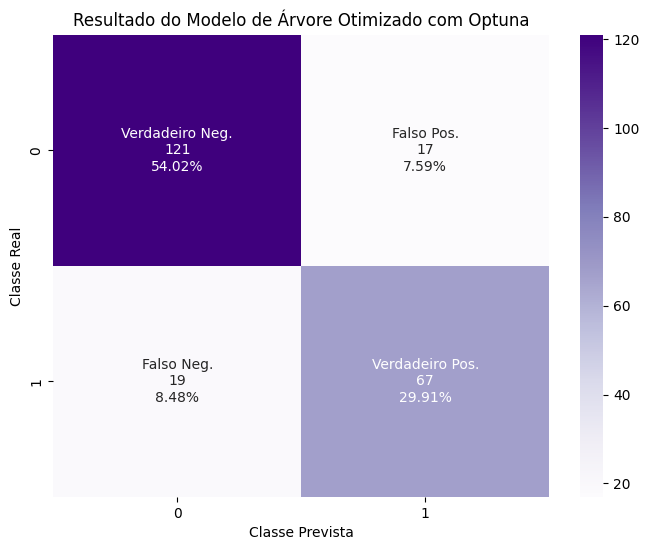


Melhores hiperparâmetros encontrados pelo Optuna:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 2}


In [ ]:
# 1. Definir a função "objetivo" que o Optuna irá otimizar
def objetivo(trial):
    # Definir o espaço de busca dos hiperparâmetros
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Criar o modelo com os hiperparâmetros sugeridos
    modelo_arvore = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Treinar e avaliar o modelo para obter a pontuação (acurácia, neste caso)
    modelo_arvore.fit(X_train, y_train)
    acuracia = modelo_arvore.score(X_test, y_test)

    # Retornar a pontuação que o Optuna deve maximizar
    return acuracia

# 2. Criar e executar o estudo do Optuna
print("--- Iniciando otimização com Optuna ---")
estudo = optuna.create_study(direction='maximize')
estudo.optimize(objetivo, n_trials=100) # n_trials é o número de combinações a testar

# 3. Criar o modelo final com os melhores parâmetros e treiná-lo
print("\n--- Treinando o modelo final com os melhores hiperparâmetros ---")
melhores_parametros = estudo.best_params
modelo_otimizado = DecisionTreeClassifier(**melhores_parametros, random_state=42)
modelo_otimizado.fit(X_train, y_train)

# --- FIM: OTIMIZAÇÃO COM OPTUNA ---


# --- INÍCIO: CÓDIGO DE AVALIAÇÃO E PLOTAGEM ---

# Fazer previsões com o modelo otimizado
previsoes_otimizadas = modelo_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relatório de Classificação (Modelo Otimizado com Optuna) ---")
print(classification_report(y_test, previsoes_otimizadas))

# Visualizar a Matriz de Confusão
print("\n--- Matriz de Confusão (Modelo Otimizado com Optuna) ---")
matriz_confusao_otimizada = confusion_matrix(y_test, previsoes_otimizadas)

# Preparação dos Rótulos com Contagens e Porcentagens
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_otimizada = ["{0:0.0f}".format(value) for value in matriz_confusao_otimizada.flatten()]
total_predicoes_otimizado = np.sum(matriz_confusao_otimizada)
porcentagens_grupos_otimizada = ["{0:.2%}".format(value/total_predicoes_otimizado) for value in matriz_confusao_otimizada.flatten()]
labels_matriz_otimizada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_otimizada, porcentagens_grupos_otimizada)]
labels_matriz_otimizada = np.asarray(labels_matriz_otimizada).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_otimizada, annot=labels_matriz_otimizada, fmt='', cmap='Purples')
plt.title('Resultado do Modelo de Árvore Otimizado com Optuna')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

# Opcional: mostrar os melhores parâmetros encontrados
print("\nMelhores hiperparâmetros encontrados pelo Optuna:")
print(estudo.best_params)


## Random forest

Treinamento e Avaliação do Random Forest

--- Comparando com o Modelo Random Forest ---

Treinando o modelo Random Forest...
Treinamento concluído.

--- Relatório de Classificação (Random Forest) ---
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       138
           1       0.70      0.73      0.72        86

    accuracy                           0.78       224
   macro avg       0.76      0.77      0.77       224
weighted avg       0.78      0.78      0.78       224


--- Matriz de Confusão (Random Forest) ---


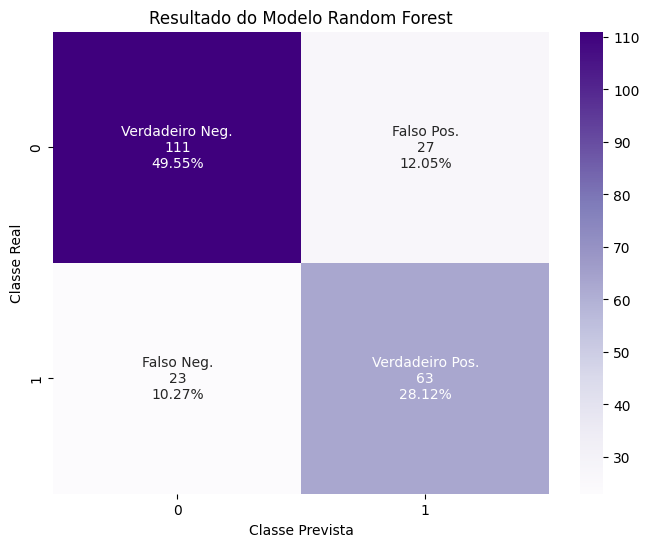

In [ ]:
# --- Código para o Modelo Random Forest ---

print("--- Comparando com o Modelo Random Forest ---")

# 1. Instanciar e treinar o modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTreinando o modelo Random Forest...")
modelo_rf.fit(X_train, y_train)
print("Treinamento concluído.")

# 2. Fazer previsões
previsoes_rf = modelo_rf.predict(X_test)

# 3. Avaliar o desempenho
print("\n--- Relatório de Classificação (Random Forest) ---")
print(classification_report(y_test, previsoes_rf))

# 4. Visualizar a Matriz de Confusão com Porcentagens
print("\n--- Matriz de Confusão (Random Forest) ---")
matriz_confusao_rf = confusion_matrix(y_test, previsoes_rf)

# Preparação dos Rótulos com Contagens e Porcentagens
contagens_grupos_rf = ["{0:0.0f}".format(value) for value in matriz_confusao_rf.flatten()]
total_predicoes_rf = np.sum(matriz_confusao_rf)
porcentagens_grupos_rf = ["{0:.2%}".format(value/total_predicoes_rf) for value in matriz_confusao_rf.flatten()]
labels_matriz_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_rf, porcentagens_grupos_rf)]
labels_matriz_rf = np.asarray(labels_matriz_rf).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_rf, annot=labels_matriz_rf, fmt='', cmap='Purples')
plt.title('Resultado do Modelo Random Forest')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

### Buscando melhores Hiperparâmetros

#### GridSearch

In [ ]:
# --- 1. Definir o Modelo e a Grade de Hiperparâmetros ---
print("--- Iniciando a busca com GridSearchCV para o Random Forest ---")
modelo_rf_base = RandomForestClassifier(random_state=42)

# ATENÇÃO: A grade abaixo é um exemplo. Grades grandes podem levar MUITO tempo para executar.
# Ajuste os valores de acordo com seu poder computacional e tempo disponível.
param_grid = {
    'n_estimators': [100, 200],              # Número de árvores na floresta
    'max_depth': [10, 20, None],             # Profundidade máxima da árvore
    'min_samples_split': [2, 5],             # Nº mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2],              # Nº mínimo de amostras em um nó folha
    'max_features': ['sqrt', 'log2']         # Nº de features a considerar para a melhor divisão
}

# --- 2. Instanciar e Configurar o GridSearchCV ---
# cv=3 significa validação cruzada com 3 dobras. Aumente para 5 para mais robustez.
# n_jobs=-1 usa todos os núcleos do processador para acelerar o processo.
# verbose=2 mostra o progresso da busca.
grid_search_rf = GridSearchCV(estimator=modelo_rf_base, param_grid=param_grid,
                              cv=3, n_jobs=-1, verbose=2)


# --- 3. Executar a Busca ---
print("\nExecutando a busca em grade... Isso pode levar alguns minutos.")
grid_search_rf.fit(X_train, y_train)
print("Busca em grade concluída.")

--- Iniciando a busca com GridSearchCV para o Random Forest ---

Executando a busca em grade... Isso pode levar alguns minutos.
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Busca em grade concluída.



Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--- Relatório de Classificação (Random Forest Otimizado) ---
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       138
           1       0.73      0.73      0.73        86

    accuracy                           0.79       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.79      0.79       224


--- Matriz de Confusão (Random Forest Otimizado) ---


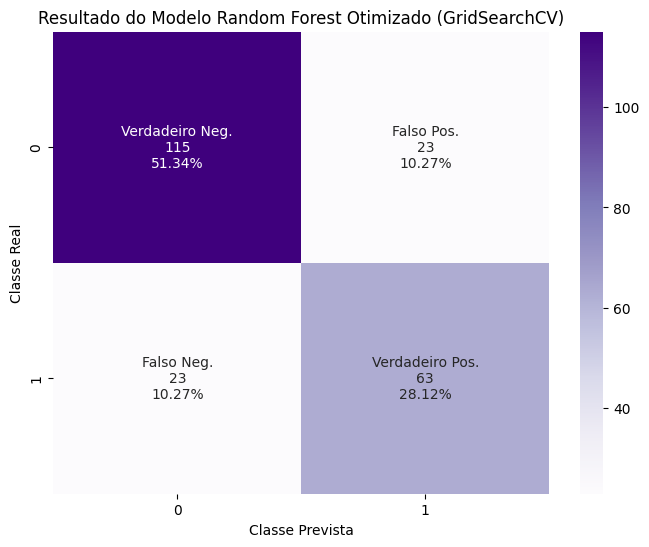

In [ ]:
# --- 4. Obter Resultados e Avaliar o Melhor Modelo ---
print("\nMelhores hiperparâmetros encontrados:")
print(grid_search_rf.best_params_)

# O melhor modelo já vem treinado com os dados de treino completos
modelo_rf_otimizado = grid_search_rf.best_estimator_

# Fazer previsões com o modelo otimizado
previsoes_rf_otimizadas = modelo_rf_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relatório de Classificação (Random Forest Otimizado) ---")
print(classification_report(y_test, previsoes_rf_otimizadas))

# Visualizar a Matriz de Confusão com Porcentagens
print("\n--- Matriz de Confusão (Random Forest Otimizado) ---")
matriz_confusao_rf = confusion_matrix(y_test, previsoes_rf_otimizadas)

# Preparação dos Rótulos
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_rf = ["{0:0.0f}".format(value) for value in matriz_confusao_rf.flatten()]
total_predicoes_rf = np.sum(matriz_confusao_rf)
porcentagens_grupos_rf = ["{0:.2%}".format(value/total_predicoes_rf) for value in matriz_confusao_rf.flatten()]
labels_matriz_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_rf, porcentagens_grupos_rf)]
labels_matriz_rf = np.asarray(labels_matriz_rf).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_rf, annot=labels_matriz_rf, fmt='', cmap='Purples')
plt.title('Resultado do Modelo Random Forest Otimizado (GridSearchCV)')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

#### Optuna

In [ ]:
# --- 1. Definir a Função "Objetivo" para o Optuna ---
def objetivo_rf(trial):
    # Definir o espaço de busca dos hiperparâmetros para o Random Forest
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Criar o modelo com os hiperparâmetros sugeridos
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # Treinar e avaliar o modelo para obter a pontuação
    modelo.fit(X_train, y_train)
    acuracia = modelo.score(X_test, y_test)

    # Retornar a pontuação que o Optuna deve maximizar
    return acuracia

# --- 2. Criar e Executar o Estudo do Optuna ---
print("--- Iniciando otimização com Optuna para o Random Forest ---")
# 'sampler' é o algoritmo de busca. TPE é o padrão e geralmente o melhor.
sampler = optuna.samplers.TPESampler(seed=42)
estudo_rf = optuna.create_study(direction='maximize', sampler=sampler)

# Iniciar a busca. 'n_trials' é o número de combinações a serem testadas.
estudo_rf.optimize(objetivo_rf, n_trials=50) # 50 tentativas para encontrar os melhores parâmetros
print("Otimização concluída.")


# --- 3. Obter o Melhor Modelo e Treiná-lo ---
print("\nMelhores hiperparâmetros encontrados:")
print(estudo_rf.best_params)

# Criar e treinar o modelo final com os melhores parâmetros encontrados pelo Optuna
modelo_rf_otimizado = RandomForestClassifier(**estudo_rf.best_params, random_state=42, n_jobs=-1)
modelo_rf_otimizado.fit(X_train, y_train)


# --- 4. Avaliar o Melhor Modelo e Plotar a Matriz de Confusão ---
# Fazer previsões
previsoes_rf_otimizadas = modelo_rf_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relatório de Classificação (Random Forest Otimizado com Optuna) ---")
print(classification_report(y_test, previsoes_rf_otimizadas))

# Visualizar a Matriz de Confusão com Porcentagens
print("\n--- Matriz de Confusão (Random Forest Otimizado com Optuna) ---")
matriz_confusao_rf = confusion_matrix(y_test, previsoes_rf_otimizadas)

# Preparação dos Rótulos
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_rf = ["{0:0.0f}".format(value) for value in matriz_confusao_rf.flatten()]
total_predicoes_rf = np.sum(matriz_confusao_rf)
porcentagens_grupos_rf = ["{0:.2%}".format(value/total_predicoes_rf) for value in matriz_confusao_rf.flatten()]
labels_matriz_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_rf, porcentagens_grupos_rf)]
labels_matriz_rf = np.asarray(labels_matriz_rf).reshape(2, 2)

[I 2025-07-25 14:26:56,017] A new study created in memory with name: no-name-533e07f7-dafd-41c5-bece-5d118b2dbd2d


--- Iniciando otimização com Optuna para o Random Forest ---


[I 2025-07-25 14:26:56,699] Trial 0 finished with value: 0.8080357142857143 and parameters: {'n_estimators': 236, 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8080357142857143.
[I 2025-07-25 14:26:57,059] Trial 1 finished with value: 0.7991071428571429 and parameters: {'n_estimators': 114, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8080357142857143.
[I 2025-07-25 14:26:59,049] Trial 2 finished with value: 0.8169642857142857 and parameters: {'n_estimators': 680, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.8169642857142857.
[I 2025-07-25 14:26:59,786] Trial 3 finished with value: 0.8169642857142857 and parameters: {'n_estimators': 270, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.81696428571428

Otimização concluída.

Melhores hiperparâmetros encontrados:
{'n_estimators': 435, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}

--- Relatório de Classificação (Random Forest Otimizado com Optuna) ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       138
           1       0.76      0.79      0.77        86

    accuracy                           0.82       224
   macro avg       0.81      0.82      0.81       224
weighted avg       0.82      0.82      0.82       224


--- Matriz de Confusão (Random Forest Otimizado com Optuna) ---


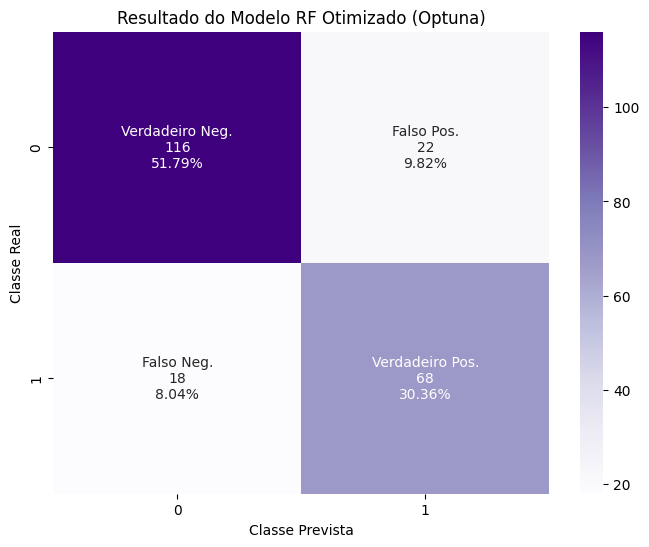

In [ ]:
# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_rf, annot=labels_matriz_rf, fmt='', cmap='Purples')
plt.title('Resultado do Modelo RF Otimizado (Optuna)')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()